## Numerical Integration
**Nick Kern**
<br>
**Astro 9: Python Programming in Astronomy**
<br>
**UC Berkeley**

Reading: [Chp. 5, Computational Physics w/ Python](http://www-personal.umich.edu/~mejn/computational-physics/)


In general, the one-dimensional integral of some function $f(x)$ over some bounds can be represented as

\begin{align}
I = \int_{a}^{b}f(x)\ \text{d} x,
\end{align}

where recall that integrals are really just giving us the area under some curve.

Some integrals we can sovlve exactly using analytic methods. However, some integrals we can't solve analytically. In which case, we can also solve integrals numerically. To do so, we approximate the integral as a discrete sum over vertical slices of the function:

\begin{align}
I \approx \sum_{k=0}^{N-1}A_{k},
\end{align}
where $A_{k}$ is the area of each slice (see below figure). Note that numerical integrals of this form are not exact: they are approximations, and we can control their errors by changing the number of slices we divide our integral into.


<img src='imgs/integral.png' width=700px/>
<center>IC: Figure 5.1, Newman</center>

One way to do this integral is to juse a step-function for each slice, in which case our slices resemble rectangles. We can see that we can easily do better by approximating the slices as **trapezoids**, which better matches the underlying function $f(x)$.

### Trapezoidal Rule

Take figure (b) as an example. Say we divide our integral evenly into N slices. Each slice has a width $h=(b-a)/N$, and has a left-hand point (LHP) and a right-hand point (RHP) on the $x$-axis. If $k$ is zeroth indexed, the LHP and RHP can be represented as

\begin{align}
LHP_{k} &= a + k\cdot h\\
RHP_{k} &= a + (k+1)\cdot h
\end{align}

The area of the $k^{th}$ trapezoid is the area of its constituent rectangle and triangle:

\begin{align}
A_{k} &= h * f(LHP) + \frac{1}{2}h\cdot\left[f(RHP)-f(LHP)\right]\\
&= \frac{1}{2}h\left[f(LHP) + f(RHP)\right]
\end{align}

Our numerical integral is then the sum of trapezoids over the entire interval. For our case where $N=4$ this looks like,

\begin{align}
I &\approx \sum_{k=0}^{N-1}A_{k} = \frac{1}{2}h\sum_{k=0}^{N-1}\left[f(a+kh) + f(a+(k+1)h)\right]\\
&= \frac{1}{2}h\left[f(a) + f(a+h) + f(a+h) + f(a+2h) + f(a+2h) + f(a+3h) + f(a+3h) + f(b) \right]
\end{align}

Note that the first and last term in this sum is just $f(a)$ and $f(b)$ and all other terms appear twice, meaning that

\begin{align}
I \approx h\left[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1}f(a+kh)\right]
\end{align}



### Breakout 1

Write a function, `trap_int`, that implements the trapezoidal rule for integration. I have gotten you started with some starter code, in which case we are feeding the integrator the function we want to integrate (`func`) and the bounds (`a`, `b`) we want it to integrate to.

Note that in this case, the number of points you need to generate along the $x$-axis is actually $N+1$ and is inclusive on both sides. There is a particular `numpy` function that is well-suited to the task and it is not `arange`!

Use your function to integrate the polynomial, $f(x) = 4x^3 - 2x^2 + 2x + 5$ for $-1 < x < 1$. How many slices do you need to achieve 1% accuracy with the exact value?

If you want to keep your results, you might want to copy over your solution into a separate script and put that outside of the Astro_9 directory: everytime I start a new lecture, your breakout material below may be erased and/or overwritten.

In [ ]:
# see NumInt_Breakout1.py

### Simpson's Rule

As we saw above, the trapezoidal rule is quick and easy to implement, and for many use-cases we can achieve good precision with dozens or hundreds of slices. There are times, however, when we need higher precision integration schemes. One way to do this is to change the way we approximate the slices of our integral. In the trapezoidal rule, we took the top of our slices to be lines, that is, a first order polynomial. To do better, we can model the tops of our slices as second order polynomials, also known as quadratics. As we will see, this will yield a more accurate integration scheme, and is called [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule).

<img src='imgs/simpson.png' width=350/>
<center>IC: Newman, Figure 5.2</center>

The idea is this, suppose we break out integral into **2 slices and 3 points** (say, Quadratic 1 in the figure), with a point at $x=-h, 0, h$. We can define a generalized quadratic as

\begin{align}
f(x) = ax^{2} + bx + c.
\end{align}

If we specify to our example above, we can find that $f(x)$ at each point is equal to: $f(-h) = ah^{2} - bh + c$, $f(0) = c$, and $f(h) = ah^{2} + bh + c$. This yields three equations and three unknowns ($a, b, c$), which means we can solve for each! Doing so yields

\begin{align}
a = \frac{1}{2h^{2}}\left[f(-h) - 2f(0) + f(h)\right];\ \ b = \frac{1}{2h}\left[f(h) - f(-h)\right];\ \ c &= f(0).
\end{align}

For our generalized quadratic, its integral from $-h < x < h$ can be expressed as

\begin{align}
\int_{-h}^{h}(ax^{2} + bx + c)\text{d}x = \frac{2}{3}ah^{3} + 2ch
\end{align}

If we plug in our values for $a$ and $c$ above, we find that the area under our quadratic can be expressed as

\begin{align}
A = \int_{-h}^{h}(ax^{2} + bx + c)\text{d}x = \boxed{\frac{1}{3}h\left[f(-h) + 4\cdot f(0) + f(h)\right].}
\end{align}

Here we have an expression for the area under a quadratic that is only dependent on the width of each slice and the y-values of the function at three points. In other words, we don't have to bother fitting a quadratic to perform its integral.

Simpson's rule is just the application of this technique **to every pair of slices**. This means we need to have an **even number of slices** for Simpson's rule to work. To do this, imagine we take all of our y-values along the integral and concatenate them into an array. When we use the above formula across all pairs of slices, it is evident that certain y-values will have multiplicative factors in the final sum. If we think about it, for our $N=4$ case, we can see that each y-value will have the following multiplicative factors in the final sum:

\begin{align}
\left[1, 4, 2, 4, 1\right]
\end{align}

which is due to the fact that points between slice-pairs get evaluated twice, and points in the middle of a slice-pair get the factor of 4 from our formula above. Lastly, points on the very edge, $f(a)\ \&\ f(b)$, only get evaluated once. How might we slice an array of y-values to pick out only the 2's and the 4's? Note that in general, our multiplicative factors will look something like: $\left[1, 4, 2, 4, 2, 4, \ldots, 4, 2, 4, 1\right]$.

This means that our final integral can be written as

\begin{align}
I = \sum A_{i} = \frac{1}{3}h\ \vec{y}\cdot\vec{w}
\end{align}

where $\vec{y}$ is a vector containing our y-values and $\vec{w}$ is a vector containing our weights, and we are taking their dot product.

### Breakout 2

Let's implement this in Python code, using the integral of a sinc function from $0 < x < 15$. The integral is equal to 1.6181944437..., and looks something like

<img src='imgs/sinc_int.png' width=300px/>
<center>IC: WolframAlpha</center>

You can get access to a `sinc` function from `np.sinc`. Note, however, that to match the figure above, you will need to use `np.sinc(x / np.pi)` instead of just `np.sinc(x)`.

1.
Write a function, `simp_int`, similar to before except use Simpson's rule to evaluate the integral: note $N$ must be even.

2.
Using both the trapezoidal rule and Simpson's rule, print out their accuracy with respect to the true value using the same slice number, $N$.

### Errors on Numerical Integration

We have acknowledged (and seen firsthand) that our numerical integration schemes are not exact; they are only approximations. It is informative to know roughly how accurate these schemes are, and how their precision compares to one another. What does the error of the numerical integral depend on? We have already seen that the fundamental parameter determining its accuracy is the width, $h$, of an individual slice: the smaller the width, the more accurate the integral. But how does the accuracy of the integration change as we change $h$?

To answer this, we need to derive the *Euler-Maclaurin* formula for the trapezoidal rule. Section 5.2 of Newman does just this. You can read it yourself if you like, but we won't cover it here. Suffice it to say, what we find is that the trapezoidal scheme has an error that, to leading order, scales as the slice width squared: $\mathcal{O}(h^{2})$. Because of this, we call the trapezoidal rule a *first-order* scheme, meaning it is accurate to $\mathcal{O}(h)$ and has error to $\mathcal{O}(h^{2})$. Simpson's rule is a *third-order* scheme, meaning it is accurate to $\mathcal{O}(h^{3})$ and has error that goes as $\mathcal{O}(h^{4})$.

**Exercise: Error Scaling of Trapezoidal and Simpson's Rule**

Let's make a practical confirmation of this using our `sinc` function example above. To do this, let's evaluate both the trapezoidal rule and Simpson's rule for various specifications of $h$, calculate the integral's error with respect to the true value, and then plot that error as a function of $h$. If the error behaves as a quadratic, then we know that $\epsilon\propto h^{2}$.

Note that we can make this easier on ourselves by plotting in log-space. Remember, in log-space, a power-law relationship like $y = x^{\alpha}$ looks like a linear relationship, whose slope is equal to $\alpha$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from NumInt_Breakout2 import *

In [2]:
# choose various slice numbers
N_values = np.arange(10, 200, 2)

# Calculate what h is
h = (15.0 - 0.0) / N_values

# true answer
true_ans = 1.6181944437

In [3]:
# Calculate absolute magnitude of Error
trap_err = np.empty(len(N_values))
simp_err = np.empty(len(N_values))
for i in range(len(N_values)):
    trap_err[i] = np.abs(trap_int(func, 0, 15, N=N_values[i]) - true_ans)
    simp_err[i] = np.abs(simp_int(func, 0, 15, N=N_values[i]) - true_ans)

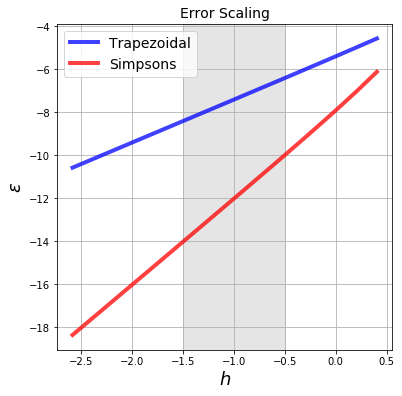

In [4]:
# Plot!
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)

# Plot trap
p1 = ax.plot(np.log(h), np.log(trap_err), color='b', alpha=0.75, linewidth=4)
p2 = ax.plot(np.log(h), np.log(simp_err), color='r', alpha=0.75, linewidth=4)

# axes labels
ax.grid(True)
ax.set_xlabel(r'$h$', fontsize=18)
ax.set_ylabel(r'$\epsilon$', fontsize=18)
ax.set_title('Error Scaling', fontsize=14)

# legend
ax.axvspan(-1.5, -.5, color='grey', alpha=0.2)
ax.legend([p1[0], p2[0]], ['Trapezoidal', 'Simpsons'], loc=2, fontsize=14)

We can see by-eye that the trapezoidal rule has a log-space slope of 2, confirming the fact that the error scales as $h^{2}$, while Simpson's rule has a log-space slope of 4, meaning it has a error scaling of $h^{4}$, just as we suspected!

### Practical Estimates of Errors

What if we don't know the integral's true value? This means we don't know a priori how good our numerical integration is. We can, however, get an estimate of its accuracy using the scaling relationships we just saw above.

Assume we estimate the true integral, $I$, with an integration scheme using $N_{1}$ slices. If the integrator has an error that scales as $\epsilon = c\cdot h^{\alpha}$ (where $c$ is a constant), then the true integral can be written as

\begin{align}
I = I_{1} - \epsilon_{1} = I_{1} - c\cdot h_{1}^{\alpha}
\end{align}

Now let's say we repeat this by doubling the slices, $N_{2} = 2N_{1}$. Similarly, we can relate the true integral to this integral's result as

\begin{align}
I = I_{2} - \epsilon_{2} = I_{2} - c\cdot h_{2}^{\alpha},
\end{align}

where $h_{2}$ is the slice width while using $N_{2}$ slices.

Now let's equate the two and use the fact that $h_{1} = 2\cdot h_{2}$ to get

\begin{align}
I_{2} - I_{1} = c\cdot h_{2}^{\alpha}\left[1-2^{\alpha}\right].
\end{align}

We can rearrange this to get an estimate of the error on the second integral, $\epsilon_{2}$:

\begin{align}
\boxed{\epsilon_{2} = c\cdot h_{2}^{\alpha} = \frac{|I_{2} - I_{1}|}{|1-2^{\alpha}|}.}
\end{align}

In the case for the trapezoidal rule, in which $\alpha = 2$, we find that $\epsilon_{2} = \frac{1}{3}|I_{2}-I_{1}|$, and for Simpson's rule in which $\alpha = 4$, we find that $\epsilon_{2} = \frac{1}{15}|I_{2} - I_{1}|$.

**Why does this matter?** This matters because we now have a way to estimate the error of our integral **without actually knowing the true answer** of the integral. This means we can choose to integrate a function to within an error threshold, and increase $N$ until our error estimate falls below the threshold. Additionally, we can easily implement this into our integration functions: anytime we use $N$ slices for an integral, we repeat the process with $N/2$ of the slices and use the above formula to estimate the error of the first sum.

### Breakout 3

1.
Modify your `simp_int` function to estimate the error of the integration using the above formula and return it along with its estimate of the integral. You may want to put your `simp_int` function into a separate script in this folder to save it.

2.
Perform the integral from the previous breakout with an error tolerance of $10^{-5}$.

### Integrals over Infinite Boundaries

If I need to integrate a function over an infinite boundary, the easiest thing to do is to *change variables* such that the boundary is no longer infinite. How might I do this you ask? Let's examine the following integral

\begin{align}
\int_{0}^{\infty}f(x)\text{d}x,
\end{align}

which is over an infinite boundary. Let's make a change of variables from $x$ to $z$ such that $z = \frac{x}{1+x}$, or similarly, $x = \frac{z}{1-z}$. In this case, $\text{d}z = (1-z)^{2}\text{d}x$ and the integral becomes

\begin{align}
\int_{0}^{1}\frac{1}{(1-z)^{2}}f\left(\frac{z}{1-z}\right)\text{d}z.
\end{align}

For bounds of $[-\infty, 0]$ we can use the same change of variables except negated, and for $[-\infty, \infty]$ we can either split the integral into $[-\infty,0]\ \&\ [0, \infty]$, or use the change of variables 

\begin{align}
x &= \frac{z}{1-z^{2}};\ \ dx = \frac{1+z^{2}}{(1-z^{2})^{2}}dz\\
&\text{or}\\
x &= \tan(z);\ \ dx = \frac{dz}{\cos^{2}z}
\end{align}

### Breakout 4

A normalized Gaussian distribution can be written as

\begin{align}
f(x\ |\ \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}},
\end{align}

where $\mu$ is the mean and $\sigma$ is the standard deviation.

1.
Integrate a normalized Gaussian function with Simpson's rule from $-\infty < x < \infty$ with an estimated error below $10^{-4}$. Select whatever values of $\mu\ \&\ \sigma$ you'd like. First, what answer do you expect to get? Second, does your result agree with your expectation? 

2.
Integrate the Gaussian from $-\sigma < x < \sigma$. What does this number represent?

**Bonus:**

3.
When particle physicists say that they have detected a statistical event at the "5-sigma" level, they mean that the probability of their measurements being due to a random coincidence (instead of a real physical phenomenon) is equal to $P_{\text{coincidence}} = 1 - \int_{-5\sigma}^{5\sigma}\mathcal{N(\mu=0,\sigma)}$, where $\mathcal{N}$ is a mean-zero normalized Gaussian distribution with standard deviation of $\sigma$. What is this probability? Statistically speaking, how many draws from this Gaussian would I need to make in order to have at least one sample lie outside of the $5\sigma$ range?